# Using the model directly
In this notebook I'll give a brief example of how to use the model directly without using the annotate function.

In [1]:
import dijkprofile_annotator
from dijkprofile_annotator.preprocessing import get_file_pairs_from_dir

path_primair_fryslan = "/home/parting/repositories/dijkprofile-annotator/data/raw_immutable/fryslan/Toetsing Primaire Keringen ronde 1"
path_regional_fryslan = "/home/parting/repositories/dijkprofile-annotator/data/raw_immutable/fryslan/Toetsing Regionale Keringen ronde 1"
path_regional_fryslan_2 = "/home/parting/repositories/dijkprofile-annotator/data/raw_immutable/fryslan/Toetsing Regionale Keringen ronde 2"
path_primair_hhnk = "/home/parting/repositories/dijkprofile-annotator/data/raw_immutable/hhnk"
path_primair_wsvv = "/home/parting/repositories/dijkprofile-annotator/data/raw_immutable/wsvv"


# pairs = [*get_file_pairs_from_dir(path_primair_hhnk), *get_file_pairs_from_dir(path_primair_fryslan), *get_file_pairs_from_dir(path_primair_wsvv, krp_format=True)]
pairs = [*get_file_pairs_from_dir(path_primair_fryslan, krp_format=False)]

print(f"found {len(pairs)} labeled profile files")

found 5 labeled profile files


In [2]:
from dijkprofile_annotator.preprocessing import *

profile_dict = file_pairs_to_tensor_profiles(pairs, 512, 'simple')
print(f"found {len(profile_dict)} labeled profiles")

found 840 labeled profiles


In [3]:
from dijkprofile_annotator.models import Dijknet
import dijkprofile_annotator.config as config
import torch
import dijkprofile_annotator

model_path = "/home/parting/repositories/dijkprofile-annotator/dijkprofile_annotator/data/trained_models/dijknet_simple_95.pt"

model = Dijknet(1, len(config.CLASS_DICT_SIMPLE))
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

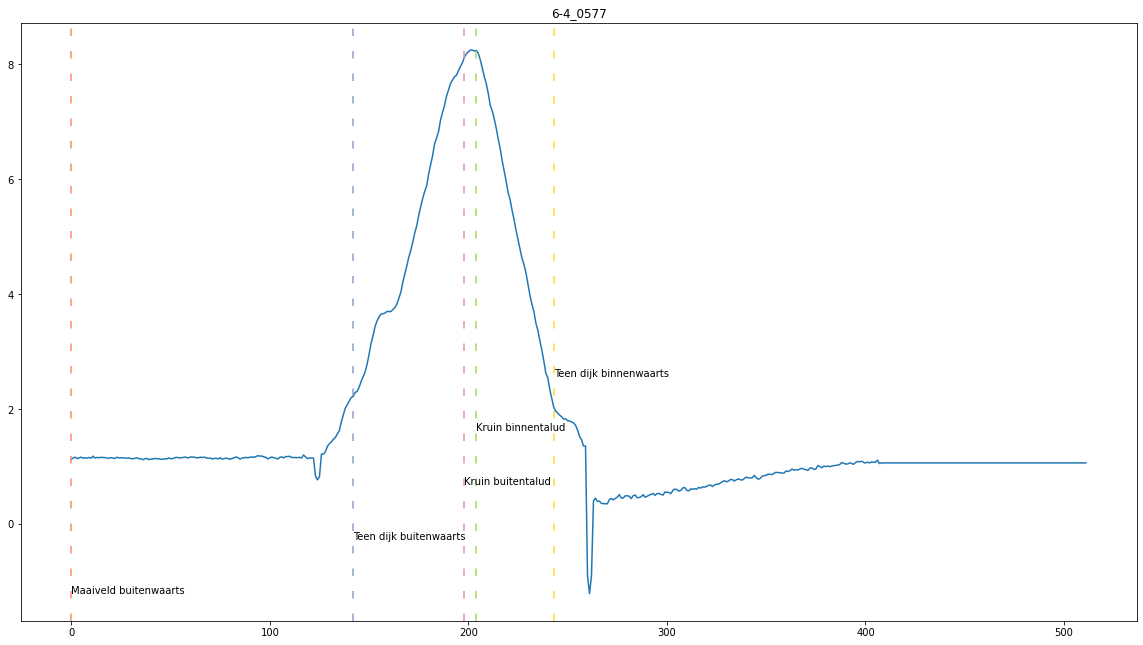

In [4]:
# plot some profiles and the labels, run this multiple times to inspect some of the labels

from dijkprofile_annotator import visualize_sample
import random
random_key = random.choice(list(profile_dict.keys()))

random_profile = profile_dict[random_key]

visualize_sample(random_profile['profile'], random_profile['label'], random_key, 'simple')

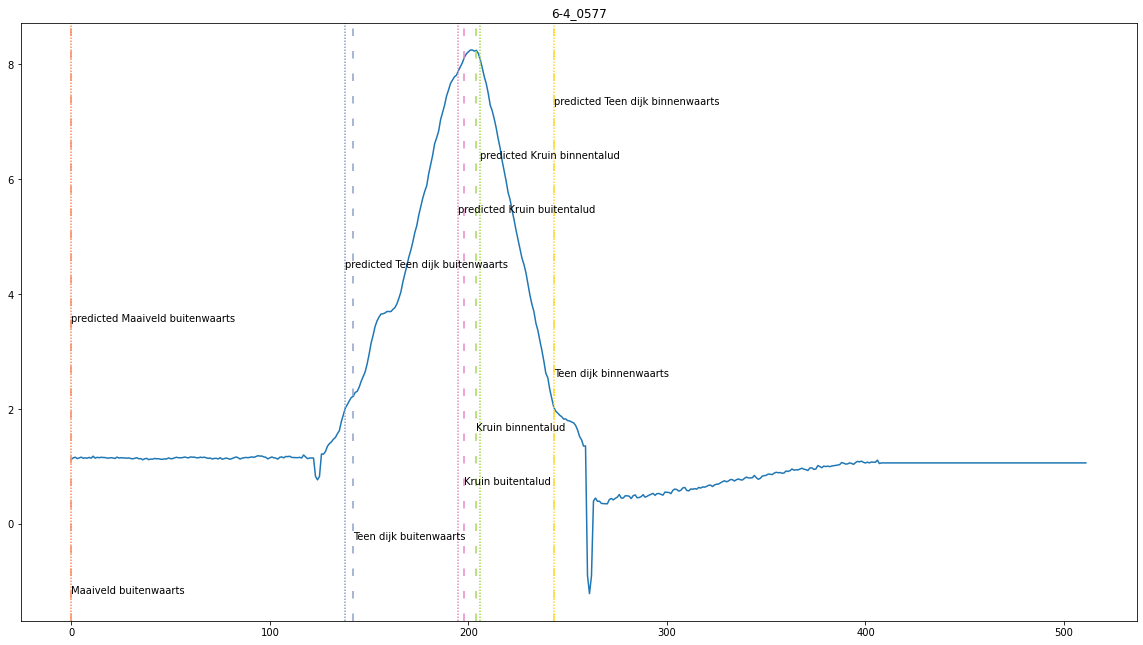

In [5]:
profile_dict[random_key]['profile']
profile = profile_dict[random_key]

prediction = model(torch.FloatTensor(profile['profile']).reshape(1,1,512))

dijkprofile_annotator.utils.visualize_prediction(profile['profile'], prediction, profile['label'], random_key, 'simple')